In [3]:
import torch
import os
import shutil
import numpy as np
import csv
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import random
#import lightninhg as L

from minerva.models.nets.time_series.gans import TTSGAN_Generator, TTSGAN_Discriminator, TTSGAN_Encoder, GAN

In [5]:
random_seed = 1

def set_seed(seed: int = 42):  
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    #L.seed_everything(seed)


def get_backbones(path_to_model, path_to_save, minerva_training = False, only_dic = False, key = 'dis_state_dict'):
    """
    Load the weights of the encoder and the generator of the trained model
    """
    set_seed(random_seed)
    model = GAN(
        generator = TTSGAN_Generator(seq_len= 60, channels=6),
        discriminator = TTSGAN_Discriminator(seq_len=60, channels=6),
        loss_gen = torch.nn.BCELoss(),
        loss_dis = torch.nn.BCELoss(),
        )
    if (minerva_training):
        model.load_state_dict(torch.load(path_to_model)[key])
    elif (only_dic):
        model.dis.load_state_dict(torch.load(path_to_model)[key], strict=False)
    else:
        model.dis.backbone.load_state_dict(torch.load(path_to_model)[key], strict=False)
    if not os.path.isdir(path_to_save):
        os.makedirs(path_to_save)
    torch.save(model.dis.backbone.state_dict(),f'{path_to_save}/final.ckpt')
    shutil.copy(path_to_model, f'{path_to_save}/original.ckpt')
    #print('done')

In [12]:
iter = 11

### Fixing backbone state dict

#### backbone untrained 

In [15]:
for i in range(5):
    root_path =f"./backbone{iter}/{i}/experiment_1_untrained"  #f"./backbones/{i}/experiment_1_untrained"
    set_seed(random_seed)
    encoder = TTSGAN_Encoder(seq_len=60, channels=6)
    if not os.path.isdir(root_path):
        os.mkdir(root_path)
    torch.save(encoder.state_dict(), f"{root_path}/final.ckpt")
    print('done')

done


FileNotFoundError: [Errno 2] No such file or directory: './backbone11/1/experiment_1_untrained'

In [8]:
#Testing every model to see if it indeed works
list_of_backbones = []

print('------------------')
for path in os.listdir('./backbones'):
    encoder = TTSGAN_Encoder(seq_len=60, channels=6)
    path = f'./backbones/{path}/experiment_1_untrained'
    encoder.load_state_dict(torch.load(f'{path}/final.ckpt'))
    print(path)
    print(encoder.state_dict().keys())
    print('------------------')

------------------
./backbones/1/experiment_1_untrained
odict_keys(['0.cls_token', '0.positions', '0.projection.1.weight', '0.projection.1.bias', '1.0.0.fn.0.weight', '1.0.0.fn.0.bias', '1.0.0.fn.1.keys.weight', '1.0.0.fn.1.keys.bias', '1.0.0.fn.1.queries.weight', '1.0.0.fn.1.queries.bias', '1.0.0.fn.1.values.weight', '1.0.0.fn.1.values.bias', '1.0.0.fn.1.projection.weight', '1.0.0.fn.1.projection.bias', '1.0.1.fn.0.weight', '1.0.1.fn.0.bias', '1.0.1.fn.1.0.weight', '1.0.1.fn.1.0.bias', '1.0.1.fn.1.3.weight', '1.0.1.fn.1.3.bias', '1.1.0.fn.0.weight', '1.1.0.fn.0.bias', '1.1.0.fn.1.keys.weight', '1.1.0.fn.1.keys.bias', '1.1.0.fn.1.queries.weight', '1.1.0.fn.1.queries.bias', '1.1.0.fn.1.values.weight', '1.1.0.fn.1.values.bias', '1.1.0.fn.1.projection.weight', '1.1.0.fn.1.projection.bias', '1.1.1.fn.0.weight', '1.1.1.fn.0.bias', '1.1.1.fn.1.0.weight', '1.1.1.fn.1.0.bias', '1.1.1.fn.1.3.weight', '1.1.1.fn.1.3.bias', '1.2.0.fn.0.weight', '1.2.0.fn.0.bias', '1.2.0.fn.1.keys.weight', '1.2.0.f

##### backbone from tts mine

In [16]:
models_directory ='iter_0' #'EVALUATING_PROBLEM/model_minerva_bs_64' #'gen_batch_size_64' # 'minerva'
log_path = 'minerva'#'logs'
alvo = f'backbone{iter}'
for i,version in enumerate(os.listdir(f'../../{log_path}/{models_directory}')): #
    path_to_save = f'./{alvo}/{i}/experiment_2_pytorch_training'
    path_to_model = f'../../{log_path}/{models_directory}/{version}/Model/checkpoint' #f'../../logs/minerva/{version}/Model/checkpoint'
    get_backbones(path_to_model, path_to_save, minerva_training=False, only_dic=True, key='dis_state_dict')

In [9]:
#Testing every model to see if it indeed works

print('------------------')
for path in os.listdir('./backbones'):
    encoder = TTSGAN_Encoder(seq_len=60, channels=6)
    path = f'./backbones/{path}/experiment_2_pytorch_training'
    encoder.load_state_dict(torch.load(f'{path}/final.ckpt'))
    print(path)
    print(encoder.state_dict().keys())
    print('------------------')

------------------
./backbones/1/experiment_2_pytorch_training
odict_keys(['0.cls_token', '0.positions', '0.projection.1.weight', '0.projection.1.bias', '1.0.0.fn.0.weight', '1.0.0.fn.0.bias', '1.0.0.fn.1.keys.weight', '1.0.0.fn.1.keys.bias', '1.0.0.fn.1.queries.weight', '1.0.0.fn.1.queries.bias', '1.0.0.fn.1.values.weight', '1.0.0.fn.1.values.bias', '1.0.0.fn.1.projection.weight', '1.0.0.fn.1.projection.bias', '1.0.1.fn.0.weight', '1.0.1.fn.0.bias', '1.0.1.fn.1.0.weight', '1.0.1.fn.1.0.bias', '1.0.1.fn.1.3.weight', '1.0.1.fn.1.3.bias', '1.1.0.fn.0.weight', '1.1.0.fn.0.bias', '1.1.0.fn.1.keys.weight', '1.1.0.fn.1.keys.bias', '1.1.0.fn.1.queries.weight', '1.1.0.fn.1.queries.bias', '1.1.0.fn.1.values.weight', '1.1.0.fn.1.values.bias', '1.1.0.fn.1.projection.weight', '1.1.0.fn.1.projection.bias', '1.1.1.fn.0.weight', '1.1.1.fn.0.bias', '1.1.1.fn.1.0.weight', '1.1.1.fn.1.0.bias', '1.1.1.fn.1.3.weight', '1.1.1.fn.1.3.bias', '1.2.0.fn.0.weight', '1.2.0.fn.0.bias', '1.2.0.fn.1.keys.weight', '

##### backbone from minerva

In [14]:
#for every model
training_folder = 'testing_error'#'experiment' #'without_callback_with_clip_grad_recomended_batch_size_64' 'ttsgan_minerva'
saving_folder = f'backbone{iter}' # 'backbone3' 'backbones'
list_of_backbones = ['version_1'] #['version_0', 'version_1', 'version_2', 'version_3', 'version_4'] 
for i,version in enumerate(list_of_backbones):
    path_to_save = f'./{saving_folder}/{i}/experiment_3_minerva_training'
    path_to_model = f'./training/{training_folder}/{version}/checkpoints/epoch=8-step=8280.ckpt'#epoch=99-step=92000.ckpt' #epoch=49-step=46000.ckpt' #epoch=49-step=46000.ckpt' #epoch=299-step=276000.ckpt' 
    get_backbones(path_to_model, path_to_save, minerva_training=True, key='state_dict')
    print(i, version)

0 version_1


In [8]:
iter = 8
version = f'version_{iter}'
training_folder = 'experiment'
saving_folder = f'backbone{iter}' 

path_to_save = f'./{saving_folder}/0/experiment_3_minerva_training'
path_to_model = f'./training/{training_folder}/{version}/checkpoints/epoch=299-step=276000.ckpt' #epoch=49-step=46000.ckpt' #epoch=49-step=46000.ckpt' #epoch=299-step=276000.ckpt' 
get_backbones(path_to_model, path_to_save, minerva_training=True, key='state_dict')

In [ ]:
#for every model
training_folder = 'ttsgan_minerva'#'ttsgan_minerva'
saving_folder = 't'
list_of_backbones = ['version_0'] #['version_0', 'version_1', 'version_2', 'version_3', 'version_4'] 
for i,version in enumerate(list_of_backbones):
    path_to_save = f'./{saving_folder}/{i}/experiment_3_minerva_training'
    path_to_model = f'./training/{training_folder}/{version}/checkpoints/epoch=299-step=276000.ckpt'
    get_backbones(path_to_model, path_to_save, minerva=True)
    print(i, version)


In [ ]:
#Testing every model to see if it indeed works

print('------------------')
for path in os.listdir('./backbones'):
    encoder = TTSGAN_Encoder(seq_len=60, channels=6)
    path = f'./backbones/{path}/experiment_3_minerva_training'
    encoder.load_state_dict(torch.load(f'{path}/final.ckpt'))
    print(path)
    print(encoder.state_dict().keys())
    print('------------------')

------------------
./backbones/1/experiment_3_minerva_training
odict_keys(['0.cls_token', '0.positions', '0.projection.1.weight', '0.projection.1.bias', '1.0.0.fn.0.weight', '1.0.0.fn.0.bias', '1.0.0.fn.1.keys.weight', '1.0.0.fn.1.keys.bias', '1.0.0.fn.1.queries.weight', '1.0.0.fn.1.queries.bias', '1.0.0.fn.1.values.weight', '1.0.0.fn.1.values.bias', '1.0.0.fn.1.projection.weight', '1.0.0.fn.1.projection.bias', '1.0.1.fn.0.weight', '1.0.1.fn.0.bias', '1.0.1.fn.1.0.weight', '1.0.1.fn.1.0.bias', '1.0.1.fn.1.3.weight', '1.0.1.fn.1.3.bias', '1.1.0.fn.0.weight', '1.1.0.fn.0.bias', '1.1.0.fn.1.keys.weight', '1.1.0.fn.1.keys.bias', '1.1.0.fn.1.queries.weight', '1.1.0.fn.1.queries.bias', '1.1.0.fn.1.values.weight', '1.1.0.fn.1.values.bias', '1.1.0.fn.1.projection.weight', '1.1.0.fn.1.projection.bias', '1.1.1.fn.0.weight', '1.1.1.fn.0.bias', '1.1.1.fn.1.0.weight', '1.1.1.fn.1.0.bias', '1.1.1.fn.1.3.weight', '1.1.1.fn.1.3.bias', '1.2.0.fn.0.weight', '1.2.0.fn.0.bias', '1.2.0.fn.1.keys.weight', '

#### See KNN training

In [5]:
import csv
import numpy as np

def extract_losses(file_path):
    knn_validation = []

    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if 'knn_accuracy' in row and row['knn_accuracy']:
                knn_validation.append(float(row['knn_accuracy']))

        return knn_validation

In [3]:
# Exemplo de uso
version = 6
file_path = f'./training/ttsgan_minerva/version_{version}/metrics.csv'

knn_loss  = extract_losses(file_path)
print("knn loss", knn_loss)

knn loss [0.2448146790266037, 0.2526884377002716, 0.4685562252998352, 0.45903199911117554, 0.46433091163635254, 0.4868919253349304, 0.4997861683368683, 0.5221021771430969, 0.5290114879608154, 0.5204450488090515, 0.5176118016242981, 0.5080875754356384, 0.4931486248970032, 0.4775102436542511, 0.46077823638916016, 0.4533187747001648, 0.4512673616409302, 0.43455541133880615, 0.43387606739997864, 0.42544546723365784, 0.42583972215652466, 0.44242915511131287, 0.44936519861221313, 0.4492360055446625, 0.4507305920124054, 0.4478706419467926, 0.44583258032798767, 0.44229328632354736, 0.43767374753952026, 0.43672263622283936, 0.4300583600997925, 0.425167053937912, 0.42231377959251404, 0.4185027480125427, 0.4168723225593567, 0.416471391916275, 0.41701486706733704, 0.41701486706733704, 0.4172799289226532, 0.4190462529659271, 0.41958972811698914, 0.42108428478240967, 0.4242092967033386, 0.4235232472419739, 0.43303412199020386, 0.43577155470848083, 0.4393041729927063, 0.4398476481437683, 0.4413355290

In [ ]:
from scipy.signal import find_peaks

vales, _ = find_peaks(-np.array(knn_loss))
picos, _ = find_peaks(knn_loss)

In [7]:
vales

array([  3,  19,  23,  35,  43,  51,  55,  76,  84,  86,  93,  96, 105,
       111, 115, 121, 123, 125, 127, 130, 135, 138, 141, 144, 147, 149,
       152, 158, 161, 165, 169, 172, 178, 180, 183, 186, 188, 190, 192,
       197, 199, 201, 203, 205, 212, 215, 218, 223, 227, 230, 235, 238,
       240, 245, 247, 250, 255, 257, 259, 261, 264, 268, 271, 275, 278,
       281, 283, 287, 290, 292, 294])

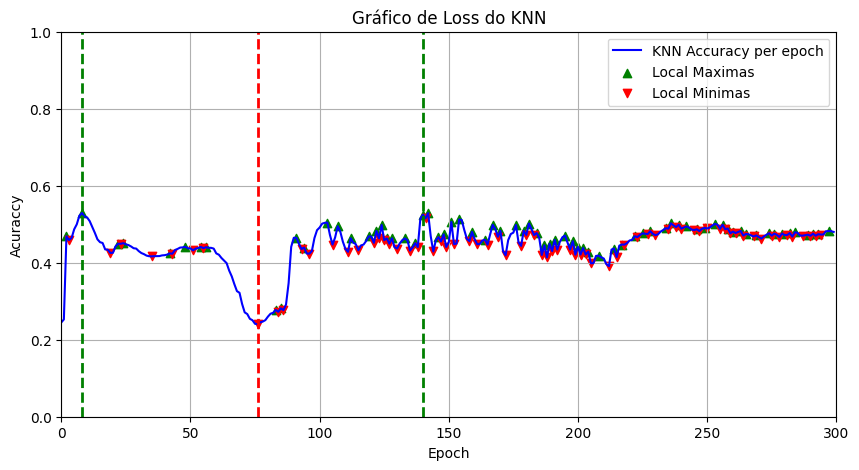

In [8]:
import matplotlib.pyplot as plt

# Criar uma lista de índices de 0 a 100
indices = list(range(len(knn_loss)))

# Criar o gráfico
plt.figure(figsize=(10, 5))
plt.plot(indices, knn_loss, marker='', linestyle='-', color='b', label='KNN Accuracy per epoch')

plt.scatter(picos, np.array(knn_loss)[picos], color='green', marker='^', label='Local Maximas')
plt.scatter(vales, np.array(knn_loss)[vales], color='red', marker='v', label='Local Minimas')

plt.axvline(x=8, color='g', linestyle='--', linewidth=2)
plt.axvline(x=140, color='g', linestyle='--', linewidth=2)

plt.axvline(x=76, color='r', linestyle='--', linewidth=2)
#plt.axvline(x=140, color='g', linestyle='--', linewidth=2)


plt.xlabel('Epoch')
plt.ylabel('Acuraccy')
plt.title('Gráfico de Loss do KNN')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Ajustar o limite do eixo y para melhor visualização
plt.xlim(0, len(knn_loss))



# Mostrar o gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 300.0)

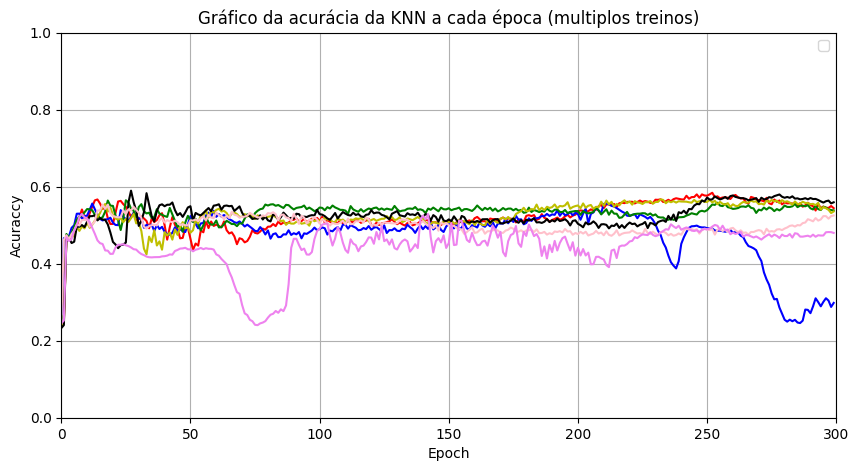

In [17]:
import os
import matplotlib.pyplot as plt

root_path = 'training/ttsgan_minerva'

plt.figure(figsize=(10, 5))
list_of_colors = ['r', 'b', 'g', 'y', 'black', 'pink', 'violet']
list_of_versions = ['version_0','version_1','version_2','version_3','version_4','version_5', 'version_6']
for i, version in enumerate(list_of_versions):
    knn_loss = extract_losses(root_path + '/' + version + '/metrics.csv')
    indices = range(len(knn_loss))
    plt.plot(indices, knn_loss, marker='', linestyle='-', color=list_of_colors[i])

plt.xlabel('Epoch')
plt.ylabel('Acuraccy')
plt.title('Gráfico da acurácia da KNN a cada época (multiplos treinos)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Ajustar o limite do eixo y para melhor visualização
plt.xlim(0, len(knn_loss))

    

#### Ver gif

In [8]:
import re
import os
from PIL import Image

def numerical_sort(value):
    """
    Custom sort function to sort filenames with numerical values correctly.
    """
    numbers = re.findall(r'\d+', value)
    return int(numbers[0]) if numbers else 0

def create_gif(image_paths, output_gif_path, duration=500):
    images = [Image.open(image_path) for image_path in image_paths]
    # Save as GIF
    images[0].save(
        f'{output_gif_path}/tsne.gif',
        save_all=True,
        append_images=images[1:],            
        duration=duration,
        loop=0  # 0 means infinite loop
    )  

In [9]:
image_save_dir = './training/ttsgan_minerva/version_5/tsne/generator'

image_files = sorted(os.listdir(image_save_dir), key=numerical_sort)
image_paths = [os.path.join(image_save_dir, file_name) for file_name in image_files if file_name.endswith('.png')]

create_gif(image_paths, image_save_dir, duration=200)

#### see if it is equal

In [4]:
import numpy as np

array1 = np.load('../../listinha1.npy')
array2 = np.load('../../listinha2.npy')
array3 = np.load('../../listinha3.npy')

np.mean(array1 == array3)

1.0